<a href="https://colab.research.google.com/github/Kewal1903/ML_Algorithms_From_Scratch/blob/main/PCA_%26_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import random
data = pd.read_csv("/content/abalone.csv")
print (data.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [ ]:
data.values

array([['M', 0.455, 0.365, ..., 0.101, 0.15, 15],
       ['M', 0.35, 0.265, ..., 0.0485, 0.07, 7],
       ['F', 0.53, 0.42, ..., 0.1415, 0.21, 9],
       ...,
       ['M', 0.6, 0.475, ..., 0.2875, 0.308, 9],
       ['F', 0.625, 0.485, ..., 0.261, 0.296, 10],
       ['M', 0.71, 0.555, ..., 0.3765, 0.495, 12]], dtype=object)

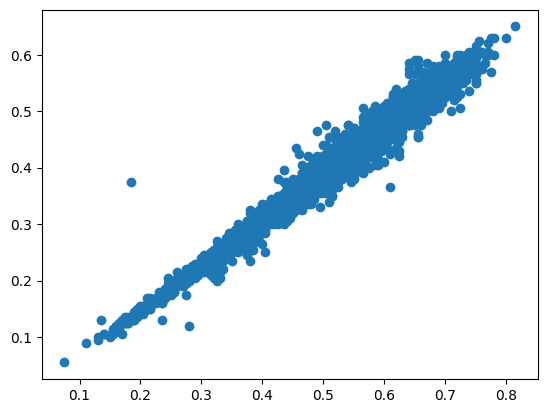

In [ ]:
x = data["Length"]
y = data["Diameter"]
plt.scatter(x,y)

In [ ]:
data = data.drop(columns = ["Sex"])
print(data.head())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [ ]:
arr1 = data.values
print(arr1)
arr1.shape

[[ 0.455   0.365   0.095  ...  0.101   0.15   15.    ]
 [ 0.35    0.265   0.09   ...  0.0485  0.07    7.    ]
 [ 0.53    0.42    0.135  ...  0.1415  0.21    9.    ]
 ...
 [ 0.6     0.475   0.205  ...  0.2875  0.308   9.    ]
 [ 0.625   0.485   0.15   ...  0.261   0.296  10.    ]
 [ 0.71    0.555   0.195  ...  0.3765  0.495  12.    ]]


(4177, 8)

In [ ]:
mean = np.mean(arr1,0)
std = np.std(arr1,0)
arr2 = ((arr1-mean)/std)
print(arr2)

[[-0.57455813 -0.43214879 -1.06442415 ... -0.72621157 -0.63821689
   1.57154357]
 [-1.44898585 -1.439929   -1.18397831 ... -1.20522124 -1.21298732
  -0.91001299]
 [ 0.05003309  0.12213032 -0.10799087 ... -0.35668983 -0.20713907
  -0.28962385]
 ...
 [ 0.6329849   0.67640943  1.56576738 ...  0.97541324  0.49695471
  -0.28962385]
 [ 0.84118198  0.77718745  0.25067161 ...  0.73362741  0.41073914
   0.02057072]
 [ 1.54905203  1.48263359  1.32665906 ...  1.78744868  1.84048058
   0.64095986]]


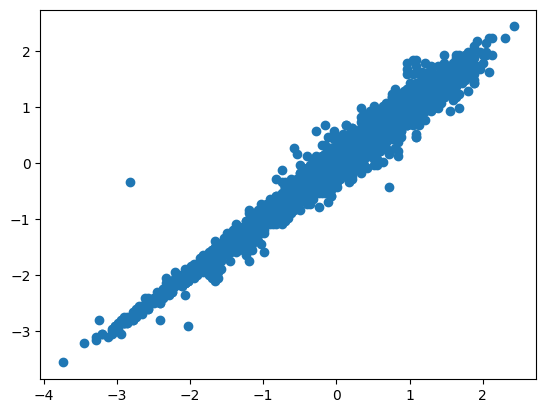

In [ ]:
plt.scatter(arr2[:,0],arr2[:,1])

In [ ]:
cmatrix = np.cov(arr2,rowvar=False)
print(cmatrix)

[[1.00023946 0.98704789 0.82775178 0.92548274 0.89812868 0.90323394
  0.89792054 0.55685289]
 [0.98704789 1.00023946 0.83388332 0.92567371 0.89337636 0.89993988
  0.90554657 0.57479746]
 [0.82775178 0.83388332 1.00023946 0.81941695 0.77515787 0.79851047
  0.81753374 0.55760082]
 [0.92548274 0.92567371 0.81941695 1.00023946 0.96963759 0.96660649
  0.95558422 0.54051908]
 [0.89812868 0.89337636 0.77515787 0.96963759 1.00023946 0.93218449
  0.88282841 0.42098444]
 [0.90323394 0.89993988 0.79851047 0.96660649 0.93218449 1.00023946
  0.90787367 0.5039399 ]
 [0.89792054 0.90554657 0.81753374 0.95558422 0.88282841 0.90787367
  1.00023946 0.62772433]
 [0.55685289 0.57479746 0.55760082 0.54051908 0.42098444 0.5039399
  0.62772433 1.00023946]]


In [ ]:
eigenval,eigenv = np.linalg.eigh(cmatrix)
print(eigenval,eigenv)

[6.39985662e-03 1.26972036e-02 6.34879663e-02 8.49700060e-02
 1.66029591e-01 2.58505008e-01 6.95779541e-01 6.71404654e+00] [[ 1.63485531e-02  6.98825733e-01  4.74968278e-02  1.11248478e-02
  -6.04053517e-01 -3.10703159e-02  6.82826958e-02 -3.72138505e-01]
 [-2.19254893e-04 -7.12985166e-01  2.33754046e-02 -5.79110156e-02
  -5.87594701e-01 -4.10050673e-02  4.00480412e-02 -3.73094111e-01]
 [ 2.68817140e-03  8.61445194e-03 -2.66914622e-02  5.67292650e-02
   2.56777039e-01 -8.99705624e-01 -7.04631477e-02 -3.40026777e-01]
 [ 8.50264371e-01 -8.33128844e-03 -1.17255046e-01 -1.56556128e-02
   2.41848954e-01  2.06193609e-01  1.37346192e-01 -3.78307478e-01]
 [-3.91100542e-01 -9.28176619e-03 -6.24892864e-01  3.98525300e-01
   1.83245659e-01  2.08286301e-01  2.98839921e-01 -3.62454487e-01]
 [-2.04179031e-01 -2.73455394e-02  7.65843810e-01  3.09821489e-01
   2.65220563e-01  1.97379538e-01  1.72978517e-01 -3.68557801e-01]
 [-2.85623992e-01  4.73950797e-02 -3.28323476e-02 -8.30563767e-01
   2.44192067

In [ ]:
sortindex = np.argsort(eigenval)[::-1]
sort_eigenvalues = eigenval[sortindex]
sort_eigenvectors = eigenv[sortindex]
eigenvectors = sort_eigenvectors[:,0:2]
pca = np.dot(arr2,eigenvectors)
print("Original dimensions:-",arr2.shape)
print("Dimensions after PCA:-",pca.shape)
print("Reduced data:-")
print(pca)

Original dimensions:- (4177, 8)
Dimensions after PCA:- (4177, 2)
Reduced data:-
[[ 0.11242655  1.56182651]
 [ 0.15461302  0.19162317]
 [-0.29271538 -0.04188548]
 ...
 [-0.17041947 -0.56655338]
 [ 0.15496313 -0.24656605]
 [ 0.63672043 -0.84508245]]


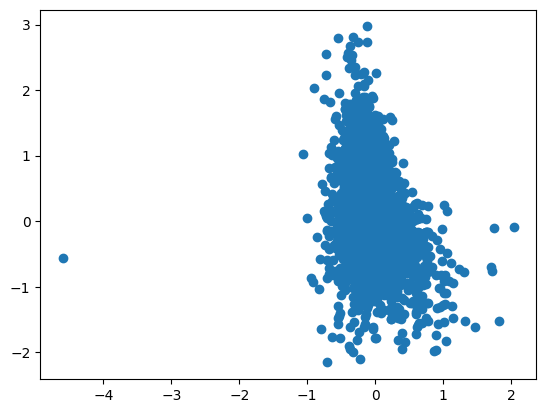

In [ ]:
plt.scatter(pca[:,0],pca[:,1])
plt.show()

In [ ]:
class KMeans:
    def __init__(self, k, data):
        self.k = k
        self.data = data
        self.centroids = random.sample(data, k)

    def fit(self):
        while True:
            labels = []
            for point in self.data:
                distances = []
                for centroid in self.centroids:
                    distances.append(np.linalg.norm(point - centroid))
                labels.append(np.argmin(distances))

                new_centroids = []
                for i in range(self.k):
                    new_centroid = np.mean(self.data[labels == i], axis=0)
                    new_centroids.append(new_centroid)
                if np.array_equal(self.centroids, new_centroids):
                    break
                self.centroids = new_centroids


    def predict(self, point):
        distances = []
        for centroid in self.centroids:
            distances.append(np.linalg.norm(point - centroid))
        return np.argmin(distances)

In [ ]:
pca_list = pca.tolist()
kmeans = KMeans(3,pca_list)
kmeans.fit
labels = []
for point in pca:
  label = kmeans.predict(point)
  labels.append(label)
print(len(labels))

4177


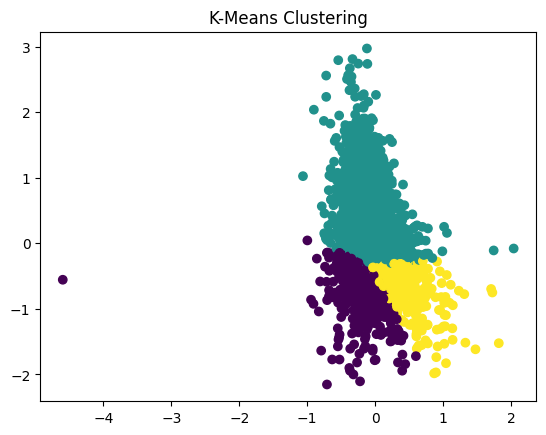

In [ ]:
plt.scatter(pca[:, 0], pca[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.show()